# MNIST Handwritten Numbers Classification

## Import Libraries

We will need to load the necessary libraries that we're gonna use in this projects. For this example here are some of the libraries that we're gonna use for this project:

- __Matplotlib:__ for visualizing data.

- __Numpy:__ for performing linear algebra and advanced matrix calcualtions.

- __pandas:__ for data processing and manipulation.

- __Tensorflow Keras:__ for creating and training our neural network. 

- __scikit learn:__ for Machine Learning and Data Science tools that will speed-up our workflow.

### Data Visualization and Manipulation Tools

In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

### Tensorflow and other Machine Learning Libraries

In [33]:
import tensorflow as tf # deep learning library. Tensors are just multi-dimensional arrays
import keras # high level neural networks API, running on top of TensorFlow
from keras.datasets import mnist # dataset
from sklearn.model_selection import train_test_split # splitting the dataset

## Loading the dataset

You will need to load the dataset that you will use for the model training. In this example we are gonna use the __MNIST Handwritten number__ dataset.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


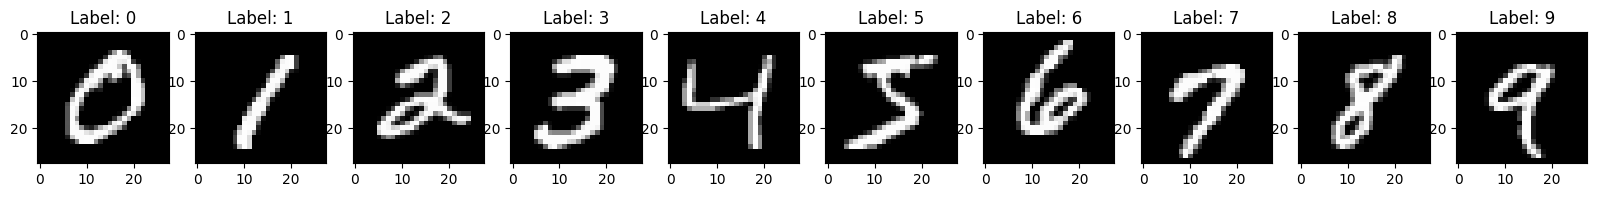

In [4]:
num_classes = 10
f, ax = plt.subplots(nrows=1, ncols=num_classes, figsize=(20,20))

for i in range(0, num_classes):
  img_sample = X_train[y_train == i][0]
  ax[i].imshow(img_sample, cmap='gray')
  ax[i].set_title('Label: ' + str(i))

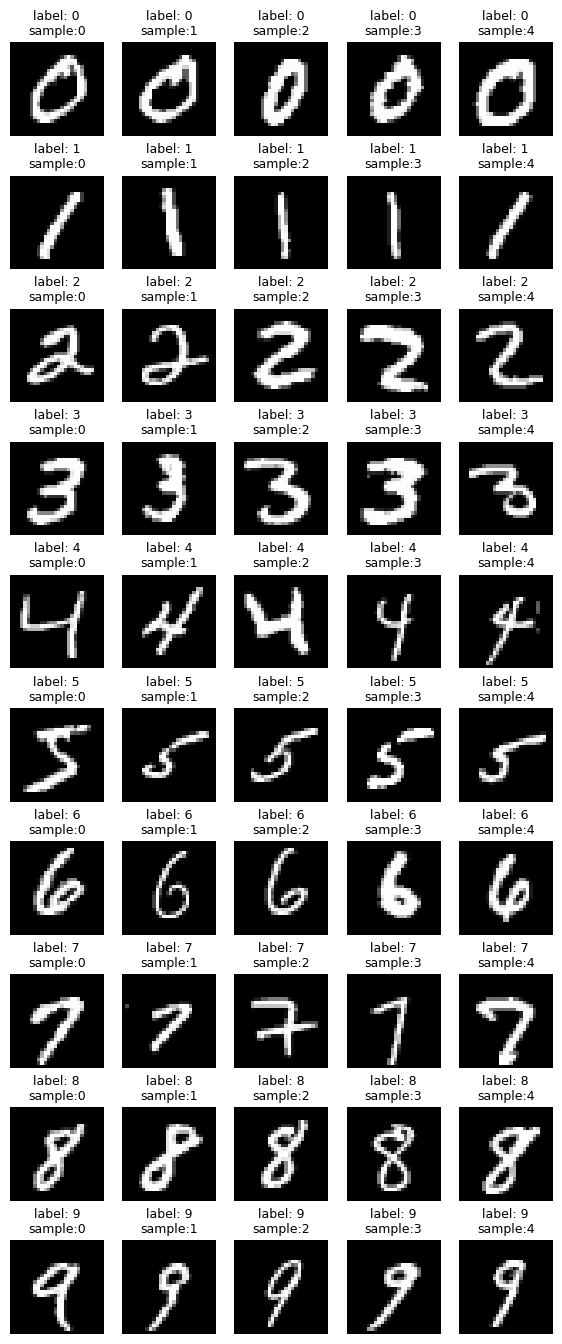

In [6]:
label_to_sample = 10
f, ax = plt.subplots(nrows=label_to_sample, ncols=5, figsize=(7,17))

for i in range(0, label_to_sample):
  img_sample = X_train[y_train == i][:5]
  for j in range(0, 5):
      ax[i][j].imshow(img_sample[j], cmap='gray')
      ax[i][j].set_title(f'label: {str(i)}\nsample:{str(j)}', fontsize=9)
      ax[i][j].axis('off')

## Prepare Data

In [7]:
# This will make the data more suitable for the neural network
# When working with images, it is common to scale the pixel values to the range 0-1
# This is called normalization
X_train = X_train / 225
X_test = X_test / 225
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
# Reshape the data to fit the model
# The first number is the number of images (60000 for X_train and 10000 for X_test)
# The second and third numbers are the dimensions of the image (28x28)
X_train_ann = X_train.reshape(X_train.shape[0], -1)
X_test_ann = X_test.reshape(X_test.shape[0], -1)
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [10]:
# One-hot encode the labels
# This means that we convert the labels into a binary matrix
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [23]:
# Split the data into training and validation sets
# The validation set will be used to evaluate the model
X_test_ann , X_valid_ann, y_test_ann, y_valid_ann = train_test_split(X_test_ann, y_test, test_size=0.5, random_state=0)
X_test_cnn , X_valid_cnn, y_test_cnn, y_valid_cnn = train_test_split(X_test_cnn, y_test, test_size=0.5, random_state=0)

## Model Creation

In the model creation we will be using 2 approaches:

- __Fully Connected Artificial Neural Network__: A feedforward fully connected densed layers. These neural networks are primarily used for creating neural networks for pattern recognition and classification using real-world data that does not need recurrent and convolutional architectures. These are note typically used for image data but let's try it.

- _Convolutional Neural Network__: A feedforward neural network composed mainly of convolutional layers. These neural networks are mostly used in image, matrix, and other multidimensional data to find patterns and endges.

### Fully Connected Artificial Neural Network

In [12]:
# Create the model
# The model is a sequential model, which means that the layers are stacked on top of each other
ann = keras.models.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation='relu'), # The input layer has 128 nodes and uses the ReLU activation function
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(.25),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(.25),
    keras.layers.Dense(10, activation='softmax') # The output layer has 10 nodes, one for each class
])

c:\Users\luis\Desktop\Programs\Data-Science-Projects\GDSC Templates\innolympics-tensorflow-template\venv\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile the model
ann.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,794 (526.54 KB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the model
history = ann.fit(X_train_ann, y_train, epochs=10, batch_size=32, validation_data=(X_valid_ann, y_valid_ann))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9769 - loss: 0.0769 - val_accuracy: 0.9762 - val_loss: 0.0789
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9810 - loss: 0.0635 - val_accuracy: 0.9808 - val_loss: 0.0760
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9847 - loss: 0.0510 - val_accuracy: 0.9766 - val_loss: 0.0901
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9865 - loss: 0.0430 - val_accuracy: 0.9814 - val_loss: 0.0681
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9876 - loss: 0.0423 - val_accuracy: 0.9794 - val_loss: 0.0850
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9880 - loss: 0.0379 - val_accuracy: 0.9790 - val_loss: 0.0878
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9897 - loss: 0.0342 - val_accuracy: 0.9816 - val_loss: 0.0845
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9903 - loss: 0.0335 - 

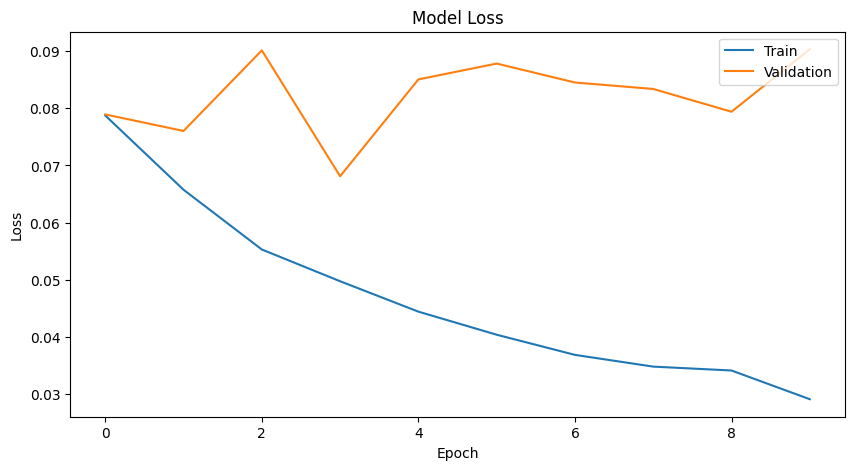

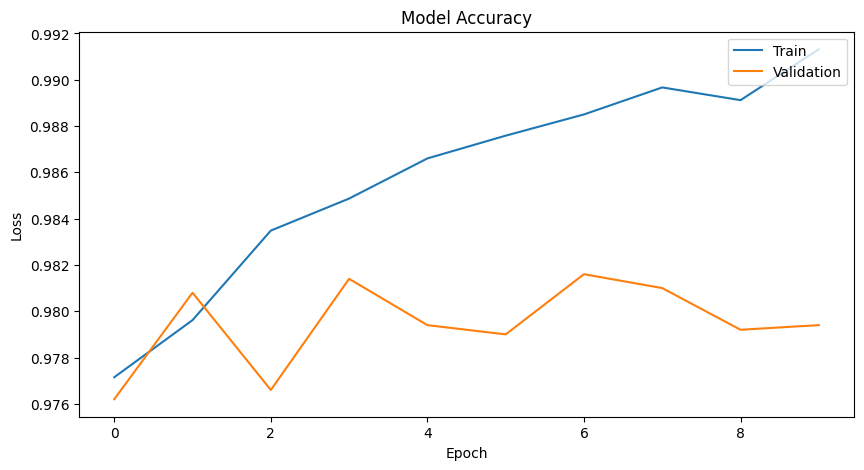

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Convolutional Neural Network

In [27]:
cnn = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),

    keras.layers.Dense(10, activation='softmax')
])

c:\Users\luis\Desktop\Programs\Data-Science-Projects\GDSC Templates\innolympics-tensorflow-template\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [28]:
cnn.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid_cnn, y_valid_cnn))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.8919 - loss: 0.3391 - val_accuracy: 0.9874 - val_loss: 0.0393
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9850 - loss: 0.0485 - val_accuracy: 0.9874 - val_loss: 0.0444
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9903 - loss: 0.0341 - val_accuracy: 0.9906 - val_loss: 0.0268
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9925 - loss: 0.0242 - val_accuracy: 0.9924 - val_loss: 0.0273
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9942 - loss: 0.0182 - val_accuracy: 0.9896 - val_loss: 0.0291
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9949 - loss: 0.0156 - val_accuracy: 0.9900 - val_loss: 0.0352
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9958 - loss: 0.0136 - val_accuracy: 0.9926 - val_loss: 0.0337
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9964 -

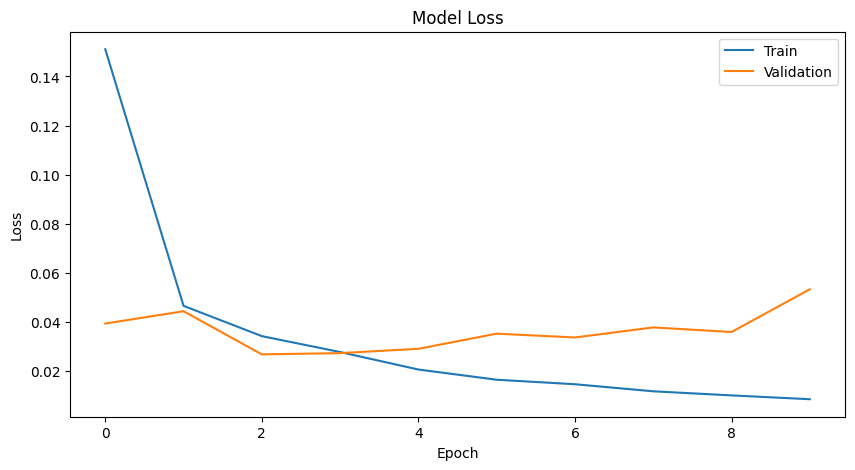

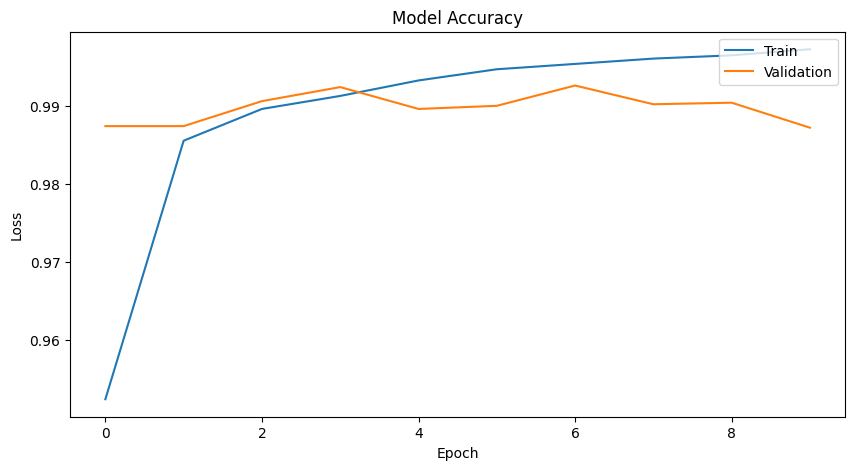

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Model Evaluation

### Fully Connected Artificial Neural Network

In [31]:
ann.evaluate(X_test_ann, y_test_ann)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9781 - loss: 0.1136


[0.11850927025079727, 0.9757999777793884]

In [34]:
predictions = ann.predict([X_test_ann])
predicted_class = tf.argmax(predictions, axis=-1).numpy()
predicted_class

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([5, 2, 9, ..., 1, 1, 6], dtype=int64)

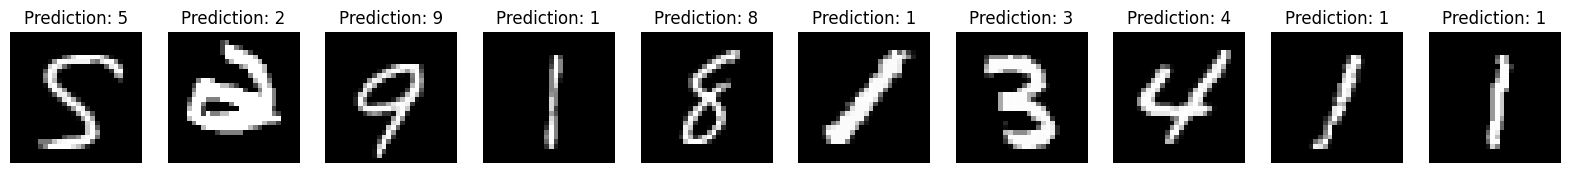

In [35]:
f, ax = plt.subplots(nrows=1, ncols=10, figsize=(20,20))

for i in range(0, 10):
    img_sample = X_test_ann[i].reshape(28, 28)
    ax[i].imshow(img_sample, cmap='gray')
    ax[i].set_title(f'Prediction: {predicted_class[i]}', fontsize=12)
    ax[i].axis('off')

plt.show()

### Convolutional Neural Network

In [36]:
cnn.evaluate(X_test_cnn, y_test_cnn)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9900 - loss: 0.0399


[0.05162419006228447, 0.9882000088691711]

In [37]:
predictions = cnn.predict([X_test_cnn])
predicted_class = tf.argmax(predictions, axis=-1).numpy()
predicted_class

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step


array([5, 2, 9, ..., 1, 1, 6], dtype=int64)

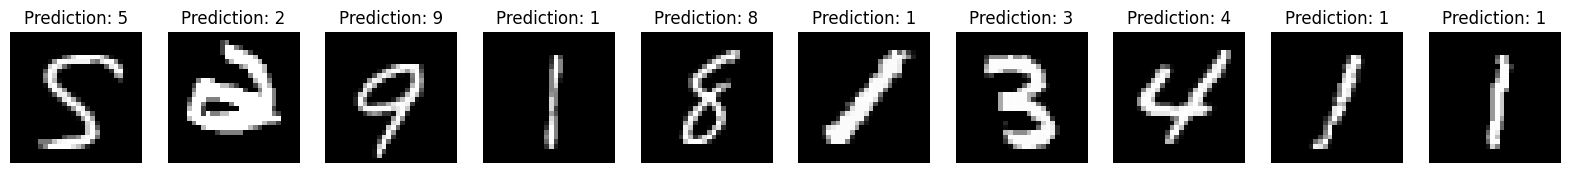

In [38]:
f, ax = plt.subplots(nrows=1, ncols=10, figsize=(20,20))

for i in range(0, 10):
    img_sample = X_test_cnn[i].reshape(28, 28)
    ax[i].imshow(img_sample, cmap='gray')
    ax[i].set_title(f'Prediction: {predicted_class[i]}', fontsize=12)
    ax[i].axis('off')

plt.show()

## Save Model

In [39]:
cnn.save('../models/MNIST-cnn-model.h5')
ann.save('../models/MNIST-ann-model.h5')